# WeatherPy
----

In [2]:
!pip install citipy

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
from scipy import stats as st

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

615

cities

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
url = "http://api.openweathermap.org/data/2.5/weather?"
params = {
    "appid": weather_api_key,
    "q": "city",
    "units": "metric"
}

response = requests.get(url, params)
print(response.url)
response.json()
    
data= response.json()

print(json.dumps(data, indent=4))

http://api.openweathermap.org/data/2.5/weather?appid=15ea7c11842d342d1a1702e00cbf204b&q=city&units=metric
{
    "coord": {
        "lon": 149.13,
        "lat": -35.28
    },
    "weather": [
        {
            "id": 801,
            "main": "Clouds",
            "description": "few clouds",
            "icon": "02d"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 21.21,
        "feels_like": 17.66,
        "temp_min": 20,
        "temp_max": 22.22,
        "pressure": 1026,
        "humidity": 40
    },
    "visibility": 10000,
    "wind": {
        "speed": 4.1,
        "deg": 310
    },
    "clouds": {
        "all": 19
    },
    "dt": 1584494925,
    "sys": {
        "type": 1,
        "id": 9588,
        "country": "AU",
        "sunrise": 1584475492,
        "sunset": 1584519497
    },
    "timezone": 39600,
    "id": 2172517,
    "name": "City",
    "cod": 200
}


In [7]:
#Create a dictionary to store the data
data = {
    "City":[],
    "Cloudiness":[],
    "Country":[],
    "Date":[],
    "Humidity":[],
    "Lat":[],
    "Lng":[],
    "Max Temp":[],
    "Wind Speed":[]
}
count = 1

In [8]:
print("Beginning Data Retrieval")
print('-----------------------------')
for city in cities:
    print(f"Processing Record {count} | {city}")
    params["q"] = city
    response = requests.get(url,params).json()
    
    if response["cod"] == "404":
        print("City not found. Try another city...")
    else:
        data["City"].append(city)
        data["Cloudiness"].append(response["clouds"]["all"])
        data["Country"].append(response["sys"]["country"])
        data["Date"].append(response["dt"])
        data["Humidity"].append(response["main"]["humidity"])
        data["Lat"].append(response["coord"]["lat"])
        data["Lng"].append(response["coord"]["lon"])
        data["Max Temp"].append(response["main"]["temp_max"])
        data["Wind Speed"].append(response["wind"]["speed"])
    count += 1
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 | mataura
Processing Record 2 | ushuaia
Processing Record 3 | barentsburg
City not found. Try another city...
Processing Record 4 | marawi
Processing Record 5 | attawapiskat
City not found. Try another city...
Processing Record 6 | albany
Processing Record 7 | bluff
Processing Record 8 | san patricio
Processing Record 9 | illoqqortoormiut
City not found. Try another city...
Processing Record 10 | zhezkazgan
Processing Record 11 | tasiilaq
Processing Record 12 | palafrugell
Processing Record 13 | taoudenni
Processing Record 14 | qaanaaq
Processing Record 15 | marzuq
Processing Record 16 | east london
Processing Record 17 | hobart
Processing Record 18 | rikitea
Processing Record 19 | taolanaro
City not found. Try another city...
Processing Record 20 | raffadali
Processing Record 21 | alofi
Processing Record 22 | thompson
Processing Record 23 | lamu
Processing Record 24 | ambon
Processing Record 25 | bredasdorp
Pro

Processing Record 227 | airai
Processing Record 228 | upernavik
Processing Record 229 | kaitangata
Processing Record 230 | severo-kurilsk
Processing Record 231 | nizhneyansk
City not found. Try another city...
Processing Record 232 | glenwood springs
Processing Record 233 | laguna
Processing Record 234 | port lincoln
Processing Record 235 | mount clemens
Processing Record 236 | javanrud
Processing Record 237 | acapulco
Processing Record 238 | stephenville
Processing Record 239 | hobyo
Processing Record 240 | grand gaube
Processing Record 241 | ekibastuz
Processing Record 242 | zlatoustovsk
City not found. Try another city...
Processing Record 243 | goderich
Processing Record 244 | kamenskoye
City not found. Try another city...
Processing Record 245 | touros
Processing Record 246 | ulaangom
Processing Record 247 | kyle of lochalsh
City not found. Try another city...
Processing Record 248 | zachagansk
City not found. Try another city...
Processing Record 249 | aasiaat
Processing Record 2

Processing Record 458 | moerai
Processing Record 459 | burgeo
Processing Record 460 | padang
Processing Record 461 | koygorodok
Processing Record 462 | roald
Processing Record 463 | port hardy
Processing Record 464 | kalmunai
Processing Record 465 | berea
Processing Record 466 | harrismith
Processing Record 467 | sakakah
Processing Record 468 | luau
Processing Record 469 | rosario
Processing Record 470 | opunake
Processing Record 471 | ostrovnoy
Processing Record 472 | qandala
Processing Record 473 | labuhan
Processing Record 474 | changji
Processing Record 475 | chabahar
Processing Record 476 | mayskiy
Processing Record 477 | manat
Processing Record 478 | viedma
Processing Record 479 | chagda
City not found. Try another city...
Processing Record 480 | karasburg
Processing Record 481 | kijang
Processing Record 482 | banda aceh
Processing Record 483 | kutum
Processing Record 484 | svetlaya
Processing Record 485 | tumbagaan
Processing Record 486 | grindavik
Processing Record 487 | catabo

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [12]:
data_df = pd.DataFrame(data)
data_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,mataura,5,NZ,1584494960,66,-46.19,168.86,15.00,4.02
1,ushuaia,40,AR,1584494865,47,-54.80,-68.30,13.00,4.10
2,marawi,95,PH,1584494961,75,8.00,124.29,27.78,1.79
3,albany,1,US,1584494952,80,42.60,-73.97,7.00,4.10
4,bluff,22,NZ,1584494961,66,-46.60,168.33,15.00,4.02


In [51]:
# Output File (CSV)
data_df.to_csv("../output_data/weather_output.csv")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

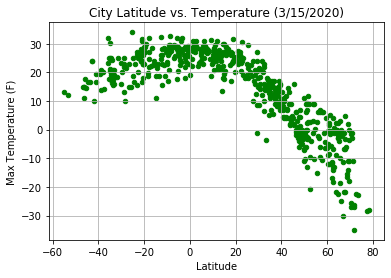

In [37]:
data_df.plot(kind='scatter',x='Lat',y='Max Temp', color="green",title='City Latitude vs. Temperature (3/15/2020)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid(b=True)
plt.savefig("../Images/Lat_Temp.png")
plt.show()


#### Latitude vs. Humidity Plot

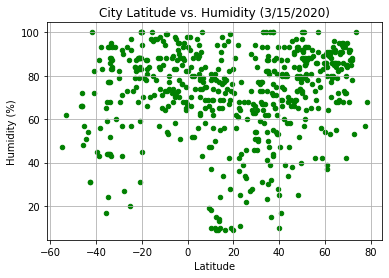

In [38]:
data_df.plot(kind='scatter',x='Lat',y='Humidity',color="green", title='City Latitude vs. Humidity (3/15/2020)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(b=True)
plt.savefig("../Images/Lat_Humid.png")
plt.show()

#### Latitude vs. Cloudiness Plot

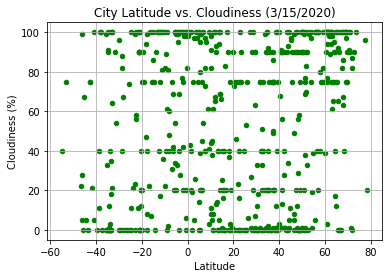

In [39]:
data_df.plot(kind='scatter',x='Lat',y='Cloudiness',color="green", title='City Latitude vs. Cloudiness (3/15/2020)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(b=True)
plt.savefig("../Images/Lat_Cloud.png")
plt.show()

#### Latitude vs. Wind Speed Plot

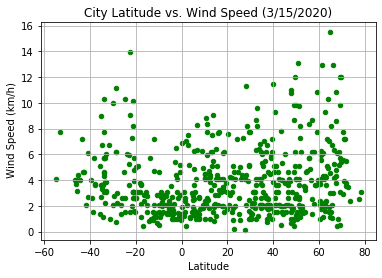

In [40]:
data_df.plot(kind='scatter',x='Lat',y='Wind Speed', color="green",title='City Latitude vs. Wind Speed (3/15/2020)')
plt.xlabel('Latitude')
plt.ylabel(' Wind Speed (km/h)')
plt.grid(b=True)
plt.savefig("../Images/Lat_Wind.png")
plt.show()

## Linear Regression

In [35]:
result= st.linregress(data_df["Lat"], data_df["Max Temp"])
result

LinregressResult(slope=-0.317197684529835, intercept=20.000767235566677, rvalue=-0.7453747007536906, pvalue=1.4238956237023787e-101, stderr=0.011935105189362851)

In [21]:
# OPTIONAL: Create a function to create Linear Regression plots
def linreg(x,y):
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x.astype(float), y.astype(float))
    regress_values = x.astype(float) * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x,y, edgecolors = "green")
    plt.plot(x,regress_values,"r-")
    plt.annotate(line_eq,(x.min(),y.max()),fontsize=12,color="red")
    print(f'The r-squared is: {rvalue}')

In [22]:
# Create Northern and Southern Hemisphere DataFrames
northern_df = data_df.loc[data_df["Lat"] >= 0]
southern_df = data_df.loc[data_df["Lat"] <= 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.9035046586767689


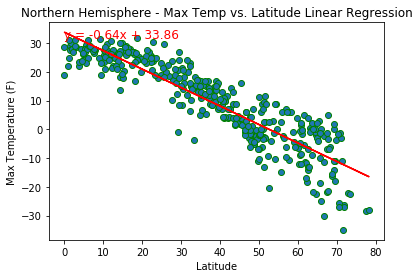

In [41]:
linreg(northern_df["Lat"], northern_df["Max Temp"])
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.savefig("../Images/NH_lat_vs_temp.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5822613040515167


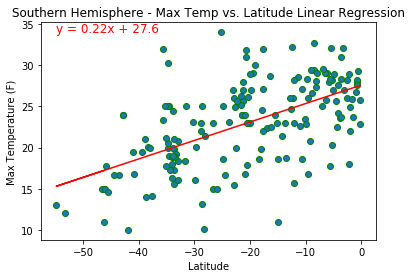

In [42]:
linreg(southern_df["Lat"], southern_df["Max Temp"])
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.savefig("../Images/SH_lat_vs_temp.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.2786773826698427


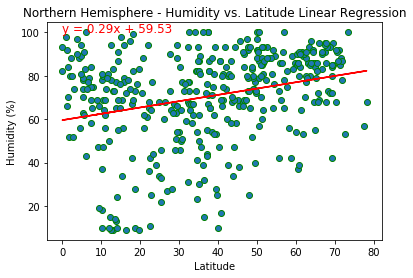

In [43]:
linreg(northern_df["Lat"], northern_df["Humidity"])
plt.title("Northern Hemisphere - Humidity vs. Latitude Linear Regression")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.savefig("../Images/NH_lat_vs_humid.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.3261809537200638


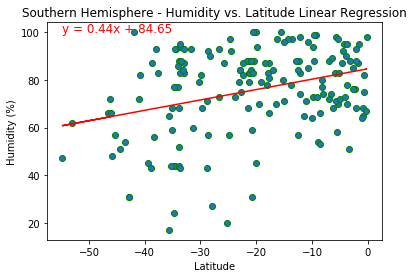

In [44]:
linreg(southern_df["Lat"], southern_df["Humidity"])
plt.title("Southern Hemisphere - Humidity vs. Latitude Linear Regression")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.savefig("../Images/SH_lat_vs_humid.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.23077216594735359


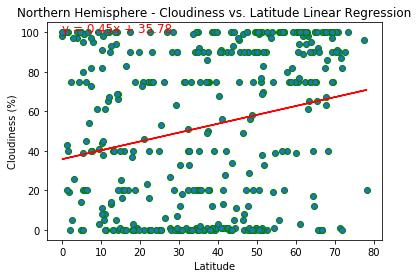

In [45]:
linreg(northern_df["Lat"], northern_df["Cloudiness"])
plt.title("Northern Hemisphere - Cloudiness vs. Latitude Linear Regression")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.savefig("../Images/NH_lat_vs_cloudiness.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.27325382956314354


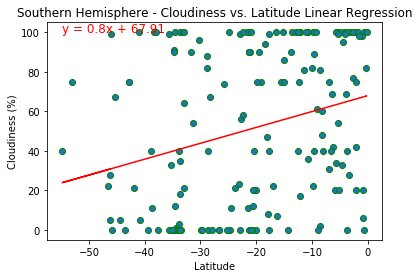

In [48]:
linreg(southern_df["Lat"], southern_df["Cloudiness"])
plt.title("Southern Hemisphere - Cloudiness vs. Latitude Linear Regression")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.savefig("../Images/SH_lat_vs_cloudiness.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.1716080078459665


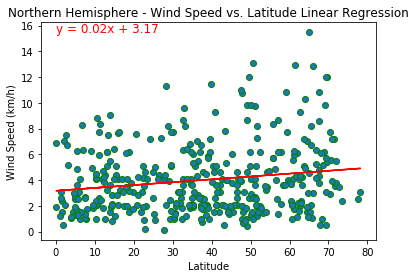

In [49]:
linreg(northern_df["Lat"], northern_df["Wind Speed"])
plt.title("Northern Hemisphere - Wind Speed vs. Latitude Linear Regression")
plt.ylabel("Wind Speed (km/h)")
plt.xlabel("Latitude")
plt.savefig("../Images/NH_lat_vs_wind.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.1716080078459665


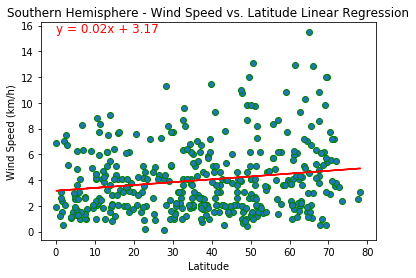

In [50]:
linreg(northern_df["Lat"], northern_df["Wind Speed"])
plt.title("Southern Hemisphere - Wind Speed vs. Latitude Linear Regression")
plt.ylabel("Wind Speed (km/h)")
plt.xlabel("Latitude")
plt.savefig("../Images/NH_lat_vs_wind.png")

According to graphics, there is a strict relationship between latitude and temperature. In northern temperature is decreasing by latitude but in southern hemisphere it is increasing.